# Assignment due Jan 22 - Linear Regression

The goal of this assignment is to explore a data set and then preform linear regression on that data. Here are the parts

- Q1 Warm Up
- Q2 Import the Data (population vs. profit) and Create a Scatter Plot
- Q3 Find information about your data: Max of each feature, Min of each feature, number of samples. Then create two numpy column vectors. One that contains population the other profit.
- Q4 Write a function that calculates the mean squared error cost function
- Q5 Create a surface plot the graphs the cost function for a range of values
- Q6 Using the Normal Equation to minimize the cost function, find the line of best fit
- Q7 Make a plot that shows the original scatter plot of the data and the line that you just created
- Q8 Write a function that uses your linear regression formula to make predictions. Given the population of the city predict what the company profits are.

Data for this assignment originally comes from: https://www.coursera.org/learn/machine-learning


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1 - Warm Up

- Write code that creates a 5x5 identiy matrix using numpy and then changes the entries along the diagonal to be the numbers 1-5.
- Create a python function that reads in an existing dataframe, a name, birth month, and favorite animal and appends this to the existing dataframe.
- Use your function to create a dataframe that contains 5 entries

In [2]:
# Matrix with 1-5 along diagonal
mat = np.eye(5)
col = np.array([1,2,3,4,5]).T # take transpose to make it into a col
mat = mat*col
print(mat)

[[1. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 5.]]


In [3]:
# Function to append dataframe
mydata = pd.DataFrame([{'Name':'Joanna','Month':'Feb','Animal':'Otter'},{'Name':'Tamara','Month':'Nov','Animal':'Cat'}])
print(mydata.head())

def append_df(df, name, birth, animal):
    new_data = pd.Series({'Name': name,'Month': birth,'Animal': animal})
    df = df.append(new_data, ignore_index = True)
    return df


     Name Month Animal
0  Joanna   Feb  Otter
1  Tamara   Nov    Cat


In [4]:
# Use your function
## add three more entries for total of five
mydata = append_df(mydata,'Sam','June','Cat')
mydata = append_df(mydata,'Joey','March','Dog')
mydata = append_df(mydata,'Jeff','October','Spider')
mydata.head()

,Name,Month,Animal
0,Joanna,Feb,Otter
1,Tamara,Nov,Cat
2,Sam,June,Cat
3,Joey,March,Dog
4,Jeff,October,Spider


## Question 2 - Import and Explore the Data

The data for this assignment can be found at

URL = http://facweb1.redlands.edu/fac/joanna_bieri/machinelearning/ex1data1.txt

this data is in csv format. It contains data that matches the population of a city (units = tens of thousands) with the profit that a company makes (units = tens of thousands).

In [5]:
# Use Pandas to read in the data, label the first column "Population" and the second column "Profit"
# Display that first few rows of the data.
URL = 'http://facweb1.redlands.edu/fac/joanna_bieri/machinelearning/ex1data1.txt'

df = pd.read_csv(URL, header = None) # use pandas to read the txt file as a csv from the url link
df.columns = ["Population","Profit"] # make df of the population and profit column
df.head()


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


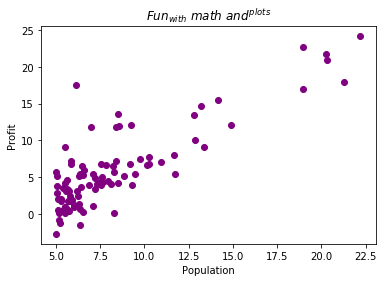

In [6]:
# Create a Scatter Plot with labeled axis that plots Population (x) vs Profit (y). Create a fun title for this plot.

x=df["Population"] # pull data from the "Population" column in the dataframe
y=df["Profit"] # pull data from the "Profit" column in the dataframe

plt.scatter(x,y, color = "purple")
plt.title("${Fun}_{with} \\ math \\ and^{plots}$")
plt.xlabel("Population")
plt.ylabel("Profit")
plt.show()

Does it appear at least plausable that this relationship can be described using linear regression (a straight line)?

It seems plausible that a straight line represents the relationship seen in the scatter plot.  Despite there being a clump around the lower y values, there some points at the upper right which makes it more likely.

In [7]:
# Prep your data for machine learning by creating two numpy column vectors
x = np.array(df["Population"]).reshape(-1,1)
y = np.array(df["Profit"]).reshape(-1,1)


In [8]:
# Append your x data to add a column of ones
col_of_ones = np.ones((len(x), 1)) # make a column of x that is length, m, with all 1's
x = np.hstack((col_of_ones, x)) # put the 1's vector to x's first column

In [9]:
# Check that the arrays are the correct shape
print("shape of x is: \n", x.shape)
print("shape of y is: \n", y.shape)

shape of x is: 
 (97, 2)
shape of y is: 
 (97, 1)


## Question 3 - Cost Function

Create a python function that reads in the vectors x and y, some parameter values theta, and the number of samples. It should return the value of the mean squared error cost function.

Test your code using our data a initial guess theta=[0,0]

NOTE: You should get The cost function value: 32.072733877455676


In [10]:
# Compute_Cost function here

def Compute_Cost(x, y, theta, m):
    h = np.matmul(theta.T,x.T)
    val1 = np.square((h.T - y))
    val2 = np.sum(val1)
    J = 1 / (2 * m) * val2
    return J



In [11]:
# Test your cost function here
theta = np.zeros((2, 1))
m = len(x)

J = Compute_Cost(x, y, theta, m)
print(J)

32.072733877455676


In the test of your cost function above you assumed that (theta1,theta2) = (0,0). What line does this represent in your scatter plot of the data? Would (theta1,theta2) = (0,0) give a very good prediction?



We assumed that (theta1, theta2) = (0,0) which represents the starting point of the gradient that we're plotting.  By picking different points it takes our program longer to find the starting point of the plot.  It seemed like (theta1, theta2) = (0,0) because the plot makes sense and the output is relatively quick so it appeared to be a good starting point.

## Question 4 - Plot the Cost Function

Here are some hints:

- create two np.arrays that contain a range of theta values
-- theta1 = [-10,10] with about 50 data points
-- theta2 = [-1, 4] with about 50 data points

- run these arrays through your python cost function to generate J values

- now you have (theta1,theta2,J) points. Use these points in plot_surface to get a nice looking curve.

In [12]:
# Code to generate J values
# HINT: use np.arange

a = 50 #50 points?
theta0 = np.arange(-10, 10, 20 / a) #start at -10 to 10, increments of 20
theta1 = np.arange(-1, 4, 5 / a) # start at -1 to 4, increments of 5

# initialize cost function values
J = np.zeros((a, a))
# calculate cost function for each theta value
for i in range(0, a):
    for j in range(0, a):
        theta[0, 0] = theta0[i]
        theta[1, 0] = theta1[j]
        J[i, j] = Compute_Cost(x, y, theta, m)

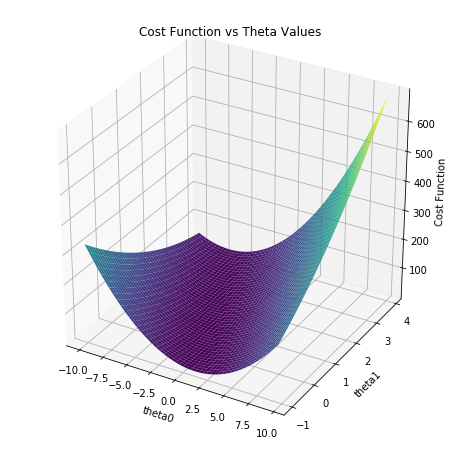

In [13]:
# Code to create a surface plot
from mpl_toolkits import mplot3d

# Plot theta0, theta1, cost
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection = "3d")

theta0, theta1 = np.meshgrid(theta0, theta1)  # make the grid

p = ax.plot_surface(theta0, theta1, J, cmap='viridis', edgecolor='none')

ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('Cost Function')
plt.title("Cost Function vs Theta Values")

plt.savefig('plot3.png', format='png')  # save file as plot3.png
plt.show()

Does the surface plot appear to have a clear global minimum?

There appears to be a global minimum where the shade of purple is darkest. This is approximately around theta0 = 1 and theta1 = -.5

## Question 5 - The Normal Equation

Use the Normal Equation developed in class to minimize the cost function. This should result in a theta1 and theta2 that can generate the line of best fit.

In [14]:
# Normal Equation Calculation
val1 = np.linalg.inv(np.matmul(x.T, x))
val2 = np.matmul(val1, x.T)
theta_normal = np.matmul(val2, y)

print(theta_normal)

[[-3.89578088]
 [ 1.19303364]]


## Question 6 - Create a Plot of the Data and the Linear Regression Line

Make a plot that shows the original scatter plot data, with nice lables, and then overlays the liner function that best fits the data.

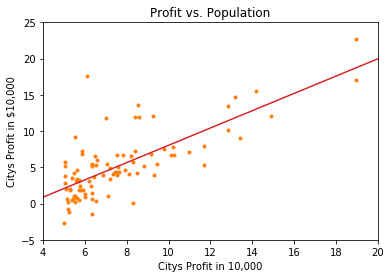

In [15]:
# Make plot
def plotLinearFit(x_stuff, theta, x, y):
    pred = np.matmul(x_stuff, theta)  # predicted y value
    plt.figure()
    plt.title('Profit vs. Population')
    plt.xlabel('Citys Profit in 10,000')
    plt.ylabel('Citys Profit in $10,000')
    plt.ylim((-5, 25))
    plt.xlim((4, 20))
    plt.plot(x, y, marker='.', linestyle = "")  # plot of data remove lines between points
    plt.plot(x_stuff, pred, linestyle = "-")  #linear fit
    plt.show()
    
# superimpose best fit
a = 10
x_stuff = np.array([np.linspace(0, 25, a)]).T
x_one = np.ones((a, 1))
x_stuff = np.hstack((x_one, x_stuff))
plotLinearFit(x_stuff, theta_normal, x, y)



How did you do? Does the line seem to match the data well?

Initially the data didn't fit well because I did not have any limits on the x and y axis, but once I narrowed down the axes limits the data fitted better.  Overall, the line seems to match the data well.

## Question 7 - Use your ML Algorithm to Make Predictions

Now write a function that takes as an input the (theta1, theta2) values and the Popation and outputs a prediction for what the profit will be.

Test your code for the following values:

Population = 3.5

Population = 7

In [16]:
# Function that takes population as an input and predicts profit

In [17]:
# Test the function
input1 = np.array([1, 3.5])
sol1 = np.matmul(input1, theta)
print("Prediction if x = 3.5: \n", sol1)
input2 = np.array([1, 7])
sol2 = np.matmul(input2, theta)
print("Prediction if x = 7: \n", sol2)

Prediction if x = 3.5: 
 [23.25]
Prediction if x = 7: 
 [36.9]
